# 5.1.1 関数について

   ### コード5.1，1変数関数のプロット（p. 162）

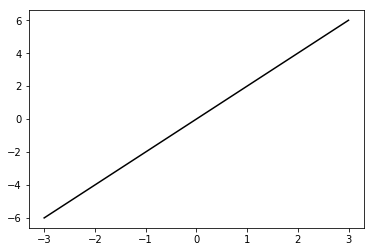

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3)
f1 = lambda x: 2*x

plt.plot(x,f1(x),color='k', linestyle='-')
plt.show()

### コード5.2，2変数関数のプロット（p. 162）

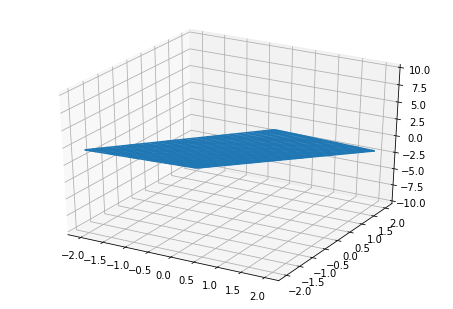

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = y = np.linspace(-2,2)
x, y = np.meshgrid(x, y)

g1 = lambda x: 2*x[0] - 3*x[1]

ax = Axes3D(plt.figure())
ax.plot_wireframe(x,y,g1([x,y]),rstride=2, cstride=2)
plt.show()

### コード5.3，2変数関数の等高線（p. 164）

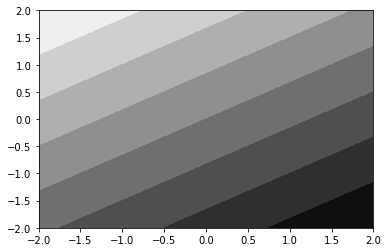

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = y = np.linspace(-2,2)
x, y = np.meshgrid(x, y)

g1 = lambda x: 2*x[0] - 3*x[1]

plt.contourf(x, y, g1([x,y]), cmap=plt.cm.binary)
plt.show()

### 勾配ベクトル、ヘッセ行列を求める例（p. 166）

In [4]:
from sympy import *
x = [Symbol('x[0]'), Symbol('x[1]')]

f1 = lambda x: (x[0]+2*x[1] -7)**2 + (2*x[0]+x[1]-5)**2

print([diff(f1(x),x[0]), diff(f1(x),x[1])])
print([[diff(f1(x),x[0],x[0]), diff(f1(x),x[0],x[1])],
       [diff(f1(x),x[1],x[0]), diff(f1(x),x[1],x[1])]])

[10*x[0] + 8*x[1] - 34, 8*x[0] + 10*x[1] - 38]
[[10, 8], [8, 10]]


### コレスキー分解の例（p. 169）

In [5]:
import numpy as np
import scipy.linalg as linalg
a = np.random.randint(-10,10,(3,2))

A = np.dot(a.T,a)
print(A)
U = linalg.cholesky(A)
print(U)
print(np.dot(U.T,U))

[[138  38]
 [ 38  67]]
[[11.74734012  3.23477482]
 [ 0.          7.51905791]]
[[138.  38.]
 [ 38.  67.]]


# 5.2.2 制約なし最小化問題のアルゴリズム

### コード 5.4， ニュートン法（p. 174）

In [6]:
import scipy.linalg as linalg
import numpy as np

f = lambda x: sum( 100*(x[i+1] - x[i]**2)**2 +(x[i]-1)**2 for i in range(2))
nf = lambda x: np.array([-400*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2, -
                         200*x[0]**2 - 400*x[1]*(-x[1]**2 + x[2]) + 202*x[1] - 2, 
                         -200*x[1]**2 + 200*x[2]])
Hf = lambda x: np.array([[1200*x[0]**2 - 400*x[1] + 2, -400*x[0], 0], 
                         [-400*x[0], 1200*x[1]**2 - 400*x[2] + 202, -400*x[1]], 
                         [0, -400*x[1], 200]])
x0 = [10,10, 10]
MEPS = 1.0e-6

k=0
while linalg.norm(nf(x0)) > MEPS:
    d = -np.dot(linalg.inv(Hf(x0)),nf(x0))
    x0 = x0+d
    k = k+1

print('iteration:', k)
print('optimal soluton:', x0)


iteration: 15
optimal soluton: [1. 1. 1.]


### 準ニュートン法（p. 175）

In [7]:
from scipy.optimize import minimize
f = lambda x: (1.5-x[0]+x[0]*x[1])**2+(2.25-x[0]+x[0]*x[1]**2)**2 +(2.625-x[0]+x[0]*x[1]**3)**2
x0 = [0,0]

res = minimize(f, x0, method='BFGS')
print(res)


      fun: 9.027274611464532e-15
 hess_inv: array([[3.23545604, 0.8083042 ],
       [0.8083042 , 0.22392594]])
      jac: array([-1.33888185e-07,  1.13254775e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([3.00000012, 0.50000005])


# 5.4.2 凸２次最適化問題

### cvxopt を用いた凸2次最適化問題の解法

In [8]:
import numpy as np
from cvxopt import solvers, matrix

Q = matrix(np.array([[2.0, -1.0], [-1.0, 3.0] ]))
c=matrix(np.array([-2.0, -4.0]))
A=matrix(np.array([[-1.0, 0.0],  [0.0, -1.0], [2.0, 3.0], [1.0,4.0]]))
b=matrix(np.array([0.0, 0.0, 6.0, 5.0]))

sol=solvers.qp(P=Q,q=c,G=A,h=b)
print(sol)
print(sol["x"])
print(sol["primal objective"])

     pcost       dcost       gap    pres   dres
 0: -4.8105e+00 -6.4700e+00  1e+01  4e-01  3e+00
 1: -4.1678e+00 -5.6606e+00  1e+00  3e-17  1e-16
 2: -4.5418e+00 -4.6061e+00  6e-02  5e-17  2e-16
 3: -4.5465e+00 -4.5472e+00  7e-04  1e-16  3e-16
 4: -4.5465e+00 -4.5465e+00  7e-06  1e-16  2e-16
 5: -4.5465e+00 -4.5465e+00  7e-08  6e-17  2e-16
Optimal solution found.
{'x': <2x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 's': <4x1 matrix, tc='d'>, 'z': <4x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 7.284650158656312e-08, 'relative gap': 1.6022504205936515e-08, 'primal objective': -4.546511622045491, 'dual objective': -4.546511694891993, 'primal infeasibility': 6.030892188481198e-17, 'dual infeasibility': 2.220446049250313e-16, 'primal slack': 1.0081752643394281e-08, 'dual slack': 4.214302890474428e-09, 'iterations': 5}
[ 1.19e+00]
[ 9.53e-01]

-4.546511622045491


### 錐最適化問題

In [9]:
import numpy as np 
import picos as pic
import matplotlib.pyplot as plt

socp=pic.Problem()
H=[0,1,2,3,4,5,6,7]
p =[[44, 47],[64, 67],[67,  9],[83, 21],
       [36, 87],[70, 88],[88, 12],[58, 65]]
w = [1, 2, 2, 1, 2, 5, 4, 1]

X=socp.add_variable('X',2)
d=[socp.add_variable('d['+str(i)+']',1) for i in H]
objective=sum(w[i]*d[i] for i in H)
socp.set_objective('min',objective)
socp.add_list_of_constraints([abs(p[i]-X) < d[i] for i in H]) 
res=socp.solve(solver='cvxopt')

--------------------------
  cvxopt CONELP solver
--------------------------
     pcost       dcost       gap    pres   dres   k/t
 0:  4.9738e-14  2.3212e-14  9e+02  5e-01  2e-16  1e+00
 1:  5.5052e+02  5.5465e+02  2e+02  1e-01  7e-16  4e+00
 2:  6.0315e+02  6.0404e+02  4e+01  2e-02  6e-16  9e-01
 3:  6.1384e+02  6.1426e+02  1e+01  9e-03  7e-16  4e-01
 4:  6.1807e+02  6.1814e+02  1e+00  7e-04  2e-16  7e-02
 5:  6.1856e+02  6.1856e+02  6e-02  4e-05  1e-15  4e-03
 6:  6.1859e+02  6.1859e+02  2e-03  1e-06  6e-15  1e-04
 7:  6.1859e+02  6.1859e+02  9e-05  6e-08  6e-13  6e-06
 8:  6.1859e+02  6.1859e+02  2e-06  2e-09  5e-12  1e-07
Optimal solution found.
cvxopt status: optimal


In [10]:
print(X.value[0])
print(X.value[1])

64.00000030746364
66.9999995552973
